In [1]:
from qiskit import IBMQ

# Load Account and Choose Backend
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
name = 'ibmqx2'
backend = provider.get_backend(name) # ibmq_16_melbourne, ibmq_vigo, ibmq_london, ibmq_burlington, ibmq_essex, ibmqx2, ibmq_ourense

In [2]:
import warnings
import sys
sys.path.insert(1, '../Scripts')
from expfuncs import *
warnings.filterwarnings('ignore')

interested_qubits = [2,1]
itr = 16
QDT_correlated = True
noise_file_address = 'Noise/'
# all_methods_data(interested_qubits,backend, itr, QDT_correlated, file_address = noise_file_address)

In [3]:
# Collect Grover Data
file_address = 'T1/'
# Groverexp(backend,file_address =file_address)

Standard Bayesian filter
Our Filter
Qubit 2
Given Lambdas [0.977 0.964]
Final Accepted Posterior Lambdas
M: 7.90575 Index: 11663 pi_obs = 21.6984 pi_Q(prior) = 2.74464
Accepted Number N: 4990, 0.125
I(pi^post_Lambda) = 1
Posterior Lambda Mean [0.95419052 0.82258482]
Posterior Lambda Mode [0.98733074 0.82833483]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.000954435
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf
0 to 1: KL-Div(qiskit,pi_D^obs) =    inf
0 to 1: KL-Div(pi_D^obs,qiskit) = 0.0161829
Post and Data: Sum of Differences  0.021905524732491508
Qisk and Data: Sum of Differences  0.13589852219974222


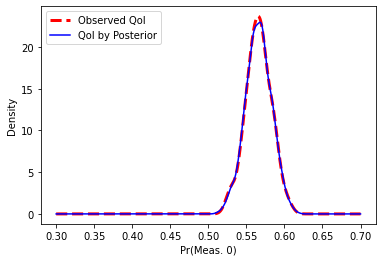

Qubit 1
Given Lambdas [0.974 0.958]
Final Accepted Posterior Lambdas
M: 3.3876 Index: 36143 pi_obs = 24.379 pi_Q(prior) = 7.19654
Accepted Number N: 11940, 0.298
I(pi^post_Lambda) = 1
Posterior Lambda Mean [0.93778117 0.89404919]
Posterior Lambda Mode [0.9819422  0.90947018]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.000854613
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf
0 to 1: KL-Div(qiskit,pi_D^obs) =    inf
0 to 1: KL-Div(pi_D^obs,qiskit) = 0.0872588
Post and Data: Sum of Differences  0.02833868564254496
Qisk and Data: Sum of Differences  0.3280128248136337


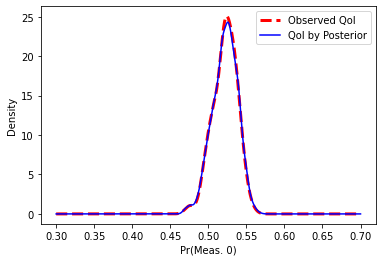

Qiskit filter
QDT filter


In [4]:
# Create Filters
# Run R file first!
our_filter, qiskit_filter, QDT_filter, SB_filter = create_filters(interested_qubits,QDT_correlated, show_denoised = True, file_address = noise_file_address)

In [5]:
# Read Grover data
with open(file_address + 'Count_Grover.csv', mode='r') as sgm:
    reader = csv.reader(sgm)
    temp_counts = {}
    for row in reader:   
        temp_counts[row[0]] = int(row[1])
real_counts = {}
for key in temp_counts.keys():
    real_counts[key[0:2]] = temp_counts[key]

In [6]:
# Filtering
mean_counts = our_filter.filter_mean(real_counts)
mode_counts = our_filter.filter_mode(real_counts)
qis_counts = qiskit_filter.apply(real_counts)
QDT_counts = QDT_filter.filter(real_counts)
sbmean_counts = SB_filter.filter_mean(real_counts)
sbmode_counts = SB_filter.filter_mode(real_counts)

In [7]:
data_shots = 8192
print('Real Device',real_counts['11']/data_shots)
print('Qiskit Method',qis_counts['11']/data_shots)
print('QDT',QDT_counts['11']/data_shots)
print('SB Mean',sbmean_counts['11']/data_shots)
print('SB Mode',sbmode_counts['11']/data_shots)
print('Mean',mean_counts['11']/data_shots)
print('Mode',mode_counts['11']/data_shots)

Real Device 0.6727294921875
Qiskit Method 0.7097114887303164
QDT 0.710693359375
SB Mean 0.909912109375
SB Mode 0.8377685546875
Mean 0.912841796875
Mode 0.8919677734375


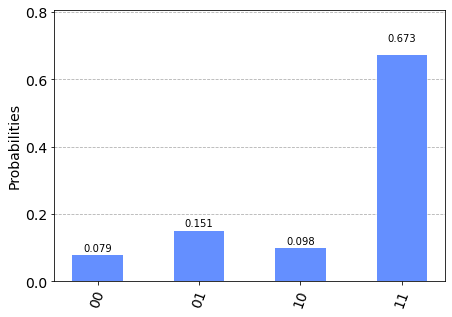

In [8]:
from qiskit.visualization import plot_histogram
plot_histogram(real_counts)

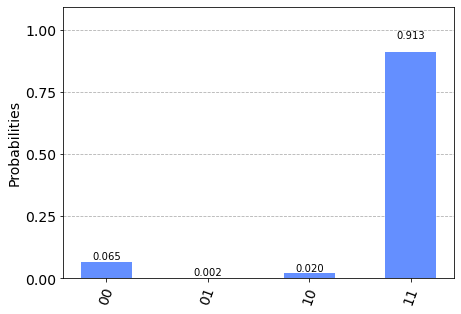

In [9]:
plot_histogram(mean_counts)

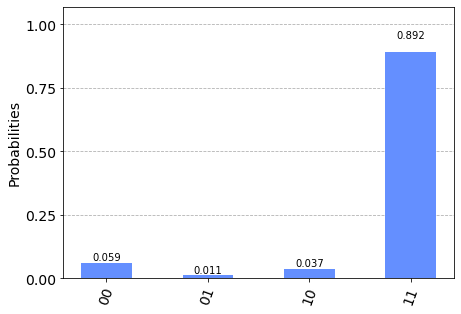

In [10]:
plot_histogram(mode_counts)

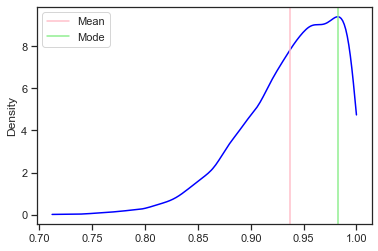

In [11]:
import scipy.stats as ss
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt 

data = our_filter.post['Qubit1'][:,0]
density = ss.gaussian_kde(data)
xline = np.linspace(min(data),max(data),200)
plt.plot(xline,density(xline),color='Blue')
plt.axvline(x=np.mean(data),color='Pink',label = 'Mean')
plt.axvline(x=our_filter.mode()[1][0],color='lightgreen',label = 'Mode')
# plt.xlabel('Pr(Meas. 11)')
plt.ylabel('Density')
# plt.title('Denoised Pr(Meas. 11)')
plt.legend()
plt.show()

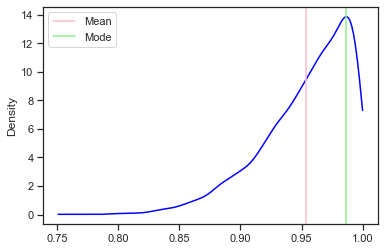

In [12]:
data = our_filter.post['Qubit2'][:,0]
density = ss.gaussian_kde(data)
xline = np.linspace(min(data),max(data),200)
plt.plot(xline,density(xline),color='Blue')
plt.axvline(x=our_filter.mean()['Qubit2'][0],color='Pink',label = 'Mean')
plt.axvline(x=our_filter.mode()['Qubit2'][0],color='lightgreen',label = 'Mode')
# plt.xlabel('Pr(Meas. 11)')
plt.ylabel('Density')
# plt.title('Denoised Pr(Meas. 11)')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
our_q1 = pd.DataFrame(our_filter.post['Qubit1'],columns=['P0','P1'])
sns.jointplot(x="P0", y="P1", data=our_q1, kind="kde", xlim=(0.6,1.02), ylim=(0.6,1.02)).set_axis_labels('$1 - \epsilon_{m0,1}$', '$1 - \epsilon_{m1,1}$')